![1.PNG](attachment:1.PNG)

![2.PNG](attachment:2.PNG)

### Import  libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

###  Load the image

In [ ]:
coco=cv2.imread("tiger.jfif")
coco=cv2.cvtColor(coco,cv2.COLOR_BGR2GRAY)
smax=3
x,y=coco.shape
print(x,y)
print(coco)
pad=1
coco=np.pad(coco , pad_width=pad)
print(coco)
output=np.zeros((x,y))

183 275
[[ 57 153  70 ...  97  96  95]
 [ 44  18  22 ...  80  79  79]
 [ 35  41  40 ...  77  77  78]
 ...
 [ 65  65  65 ... 183  62   3]
 [ 76  76  76 ...  72  89  71]
 [ 82  82  82 ...  83  65  78]]
[[  0   0   0 ...   0   0   0]
 [  0  57 153 ...  96  95   0]
 [  0  44  18 ...  79  79   0]
 ...
 [  0  76  76 ...  89  71   0]
 [  0  82  82 ...  65  78   0]
 [  0   0   0 ...   0   0   0]]


### Define the adaptive median filter function

In [ ]:


def B(zmed,zmin,zmax,zxy):
    b1=zxy-zmin
    b2=zxy-zmax
    if b1>0 and b2<0:

        return zxy

    else:

        return zmed
def median(zxy,i,j,w,matrix,pad):

    filtr=np.zeros((w,w))
    filtr=matrix[i-1:i+(w-1),j-1:j+(w-1)]

    zmin=np.min(filtr)
    zmax=np.max(filtr)
    zmed=int(np.median(filtr))

    a1=zmed-zmin
    a2=zmed-zmax
    if a1>0 and a2 <0:

        return B(zmed,zmin,zmax,zxy)
    else:
        w=w+2
        if w<=smax:

            pad+=1


            padded=np.pad(matrix,pad_width=pad)

            return median(zxy,i,j,w,padded,pad)
        elif w>smax:
            return zmed



###  Apply the adaptive median filter

In [ ]:
print(coco)
smax=9
sxy=3
i=1
j=1
while i <x:
    while j <y:
        out=median(int(coco[i][j]),i,j,sxy,coco,pad)
        output[i][j]=out
        j+=1
    i+=1

    j=1
print(output)

[[  0   0   0 ...   0   0   0]
 [  0  57 153 ...  96  95   0]
 [  0  44  18 ...  79  79   0]
 ...
 [  0  76  76 ...  89  71   0]
 [  0  82  82 ...  65  78   0]
 [  0   0   0 ...   0   0   0]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.  22. ... 126.  97.  96.]
 [  0.  44.  41. ...  77.  80.  79.]
 ...
 [  0.  64.  65. ...  51.  22.  48.]
 [  0.  65.  65. ...  58.  62.  62.]
 [  0.  76.  76. ...  79.  72.  89.]]


### Save the filtered image

True

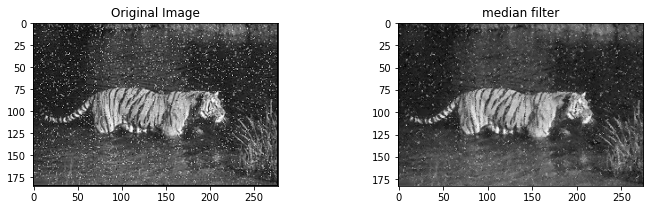

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax[0].imshow(coco,cmap="gray")
ax[0].set_title('Original Image')
median=cv2.medianBlur(coco,3)
ax[1].imshow(output,cmap="gray")
ax[1].set_title('median filter')
cv2.imwrite('output.png',output)